<a href="https://colab.research.google.com/github/light-ti-man/Drop_of_my_Python_Projects/blob/master/Time_Series/time_series_modelling_with_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Acquire Data From wwo**

In [ ]:
import requests
import pandas as pd

In [ ]:
!pip install wwo-hist

In [ ]:
# import the package and function
from wwo_hist import retrieve_hist_data

# set working directory to store output csv file(s)
import os
os.chdir("/content")

In [ ]:
FREQUENCY = 24
START_DATE = '11-JAN-2010'
END_DATE = '11-DEC-2019'
API_KEY = ''
LOCATION_LIST = ['Lagos']

hist_weather_data = retrieve_hist_data(API_KEY,
                                LOCATION_LIST,
                                START_DATE,
                                END_DATE,
                                FREQUENCY,
                                location_label = True,
                                export_csv = True,
                                store_df = True)



Retrieving weather data for Lagos


Currently retrieving data for Lagos: from 2010-01-11 to 2010-01-31
Time elapsed (hh:mm:ss.ms) 0:00:01.171223
Currently retrieving data for Lagos: from 2010-02-01 to 2010-02-28
Time elapsed (hh:mm:ss.ms) 0:00:02.250688
Currently retrieving data for Lagos: from 2010-03-01 to 2010-03-31
Time elapsed (hh:mm:ss.ms) 0:00:03.407925
Currently retrieving data for Lagos: from 2010-04-01 to 2010-04-30
Time elapsed (hh:mm:ss.ms) 0:00:04.426964
Currently retrieving data for Lagos: from 2010-05-01 to 2010-05-31
Time elapsed (hh:mm:ss.ms) 0:00:05.484721
Currently retrieving data for Lagos: from 2010-06-01 to 2010-06-30
Time elapsed (hh:mm:ss.ms) 0:00:06.564662
Currently retrieving data for Lagos: from 2010-07-01 to 2010-07-31
Time elapsed (hh:mm:ss.ms) 0:00:07.646385
Currently retrieving data for Lagos: from 2010-08-01 to 2010-08-31
Time elapsed (hh:mm:ss.ms) 0:00:08.634253
Currently retrieving data for Lagos: from 2010-09-01 to 2010-09-30
Time elapsed (hh:mm:ss.

**Load Data**

In [ ]:
#import libraries
import numpy as np
import pandas as pd
from pandas import datetime
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from matplotlib import pyplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#load data
df = pd.read_csv('Lagos.csv', parse_dates = ['date_time'], index_col = ['date_time'])
df.head()

,Lagos_maxtempC,Lagos_mintempC,Lagos_totalSnow_cm,Lagos_sunHour,Lagos_uvIndex,Lagos_moon_illumination,Lagos_moonrise,Lagos_moonset,Lagos_sunrise,Lagos_sunset,Lagos_DewPointC,Lagos_FeelsLikeC,Lagos_HeatIndexC,Lagos_WindChillC,Lagos_WindGustKmph,Lagos_cloudcover,Lagos_humidity,Lagos_precipMM,Lagos_pressure,Lagos_tempC,Lagos_visibility,Lagos_winddirDegree,Lagos_windspeedKmph,Lagos_location
date_time,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-11,31,26,0.0,11.5,7,19,03:44 AM,03:44 PM,07:01 AM,06:48 PM,25,33,33,29,16,15,80,0.7,1010,31,10,219,12,Lagos
2010-01-12,34,26,0.0,11.5,7,12,04:36 AM,04:35 PM,07:01 AM,06:48 PM,25,36,36,30,16,5,76,0.0,1010,34,10,245,11,Lagos
2010-01-13,32,26,0.0,11.5,7,5,05:28 AM,05:27 PM,07:02 AM,06:49 PM,25,34,34,29,19,9,79,0.0,1010,32,10,224,14,Lagos
2010-01-14,30,26,0.0,11.5,7,0,06:17 AM,06:17 PM,07:02 AM,06:49 PM,24,33,33,28,18,21,80,1.3,1011,30,10,217,13,Lagos
2010-01-15,31,26,0.0,11.5,7,0,07:04 AM,07:06 PM,07:02 AM,06:49 PM,24,33,33,29,15,16,79,0.7,1012,31,10,208,11,Lagos


In [ ]:
#view all the available features
df.columns

Index(['Lagos_maxtempC', 'Lagos_mintempC', 'Lagos_totalSnow_cm',
       'Lagos_sunHour', 'Lagos_uvIndex', 'Lagos_moon_illumination',
       'Lagos_moonrise', 'Lagos_moonset', 'Lagos_sunrise', 'Lagos_sunset',
       'Lagos_DewPointC', 'Lagos_FeelsLikeC', 'Lagos_HeatIndexC',
       'Lagos_WindChillC', 'Lagos_WindGustKmph', 'Lagos_cloudcover',
       'Lagos_humidity', 'Lagos_precipMM', 'Lagos_pressure', 'Lagos_tempC',
       'Lagos_visibility', 'Lagos_winddirDegree', 'Lagos_windspeedKmph',
       'Lagos_location'],
      dtype='object')

In [ ]:
#select a feature
df_ts = df['Lagos_tempC'] 
df_ts.head(5)

date_time
2010-01-11    31
2010-01-12    34
2010-01-13    32
2010-01-14    30
2010-01-15    31
Name: Lagos_tempC, dtype: int64

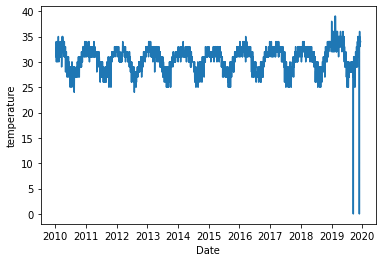

In [ ]:
#plot the feature against time
plt.xlabel('Date')
plt.ylabel('temperature')
plt.plot(df_ts, scalex=True, scaley=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


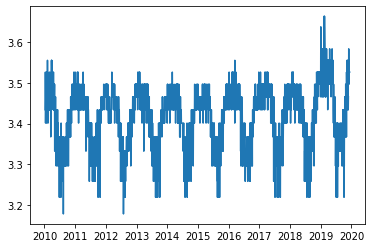

In [ ]:
#plot feature differencing against time
df_log = np.log(df_ts)
plt.plot(df_log)

In [ ]:
df_log.sample(10)

date_time
2011-04-16    3.433987
2016-10-13    3.433987
2012-11-17    3.465736
2010-01-28    3.433987
2017-03-02    3.465736
2018-03-10    3.433987
2012-08-05    3.332205
2014-05-08    3.401197
2012-08-17    3.295837
2014-10-08    3.401197
Name: Lagos_tempC, dtype: float64

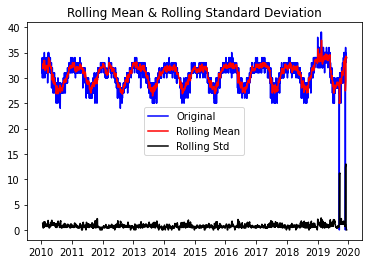

In [ ]:
#visualization of the rolling average and standard deviation
rolling_mean = df_ts.rolling(window = 7).mean()
rolling_std = df_ts.rolling(window = 7).std()
plt.plot(df_ts, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

Taking the log of the dependent variable is as simple way of lowering the rate at which rolling mean increases.

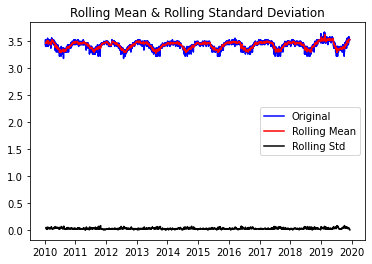

In [ ]:
#visualization of the log of rolling average and standard deviation
rolling_mean = df_log.rolling(window = 7).mean()
rolling_std = df_log.rolling(window = 7).std()
plt.plot(df_log, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [ ]:
#Adfuller Test to categorize the time series data
result_ts = adfuller(df_ts)
print('Time Series Temperature Data')
print('ADF Statistic: {}'.format(result_ts[0]))
print('p-value: {}'.format(result_ts[1]))
print('Critical Values:')
for key, value in result_ts[4].items():
    print('\t{}: {}'.format(key, value))

Time Series Temperature Data
ADF Statistic: -4.050467717587814
p-value: 0.001168122567719012
Critical Values:
	1%: -3.4321723282160366
	5%: -2.8623452024961766
	10%: -2.567198622175818


The ADF Statistic is far from the critical values and the p-value is less than the threshold (0.05). Thus, we can conclude that the time series is stationary.



# **Forecasting**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
df_log.head(10)

date_time
2010-01-11    3.433987
2010-01-12    3.526361
2010-01-13    3.465736
2010-01-14    3.401197
2010-01-15    3.433987
2010-01-16    3.465736
2010-01-17    3.496508
2010-01-18    3.496508
2010-01-19    3.496508
2010-01-20    3.465736
Name: Lagos_tempC, dtype: float64

In [ ]:
np.isnan(df_log).any()

False

In [ ]:
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

The ADF Statistic is far from the critical values and the p-value is greater than the threshold (0.05). Thus, we can conclude that the time series is not stationary.

In [ ]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['Passengers'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)

In [ ]:
results.plot_predict(1,264)

In [ ]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

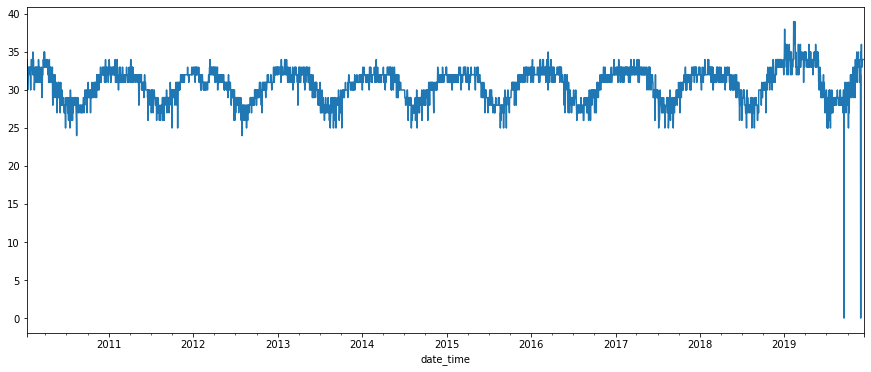

In [ ]:
df_ts.plot(figsize=(15, 6))
plt.show()

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:35091.26016249036
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:30342.211344308944
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:14281.06159643409
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:13494.334352079664
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:14285.119386475502
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:13533.810684687509
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:13452.74462914591
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:13420.854564638
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:30391.629828801764
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:26332.343800249946
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:14118.113269305213
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:13111.709693081972
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:14124.670078610092
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:13150.161993923033
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:13172.42419082026
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:13063.728514066852
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:13499.718945035758
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:13461.748648483024

In [ ]:
mod = sm.tsa.statespace.SARIMAX(df_ts,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0693      0.008      8.928      0.000       0.054       0.085
ma.L1         -1.1955      0.010   -121.580      0.000      -1.215      -1.176
ar.S.L12      -0.0476      0.012     -3.891      0.000      -0.072      -0.024
ma.S.L12      -0.9390      0.004   -225.304      0.000      -0.947      -0.931
sigma2         1.0727      0.017     61.539      0.000       1.038       1.107


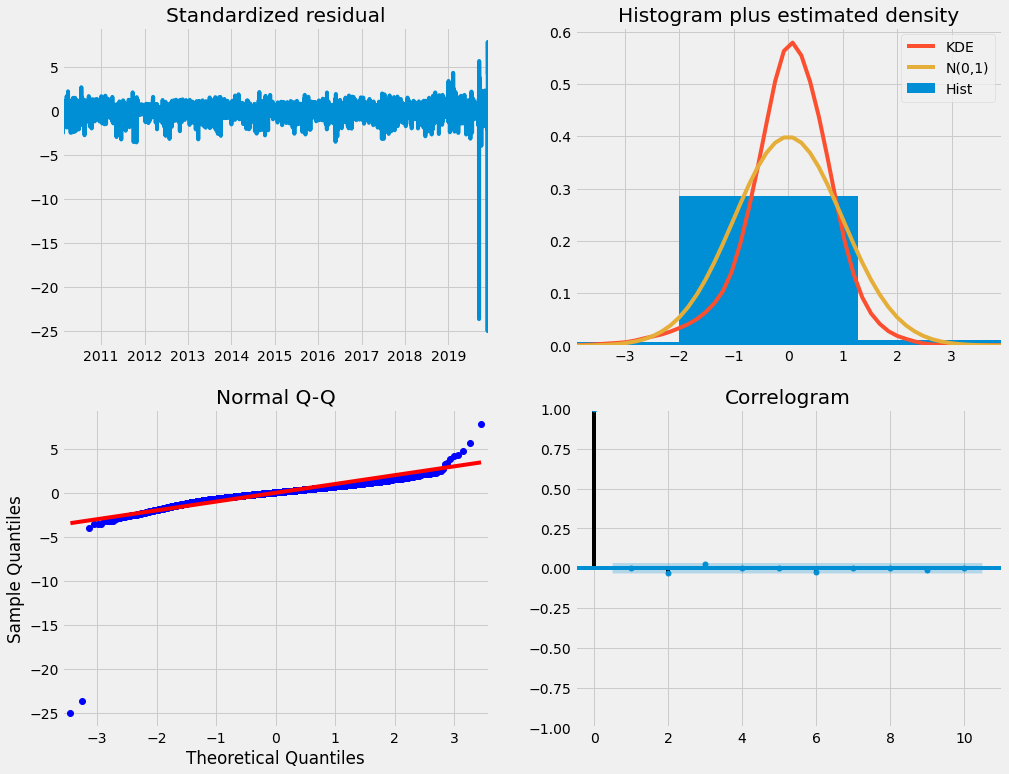

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()

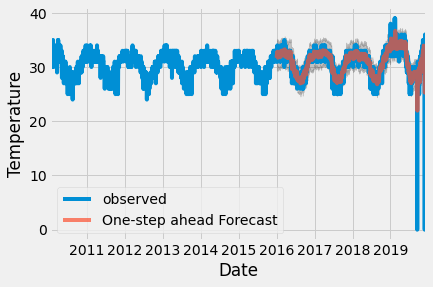

In [ ]:
ax = df_ts['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.legend()

plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = df_ts['2016-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2.58


In [ ]:
# Get forecast 400 steps ahead in future
pred_uc = results.get_forecast(steps=400)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

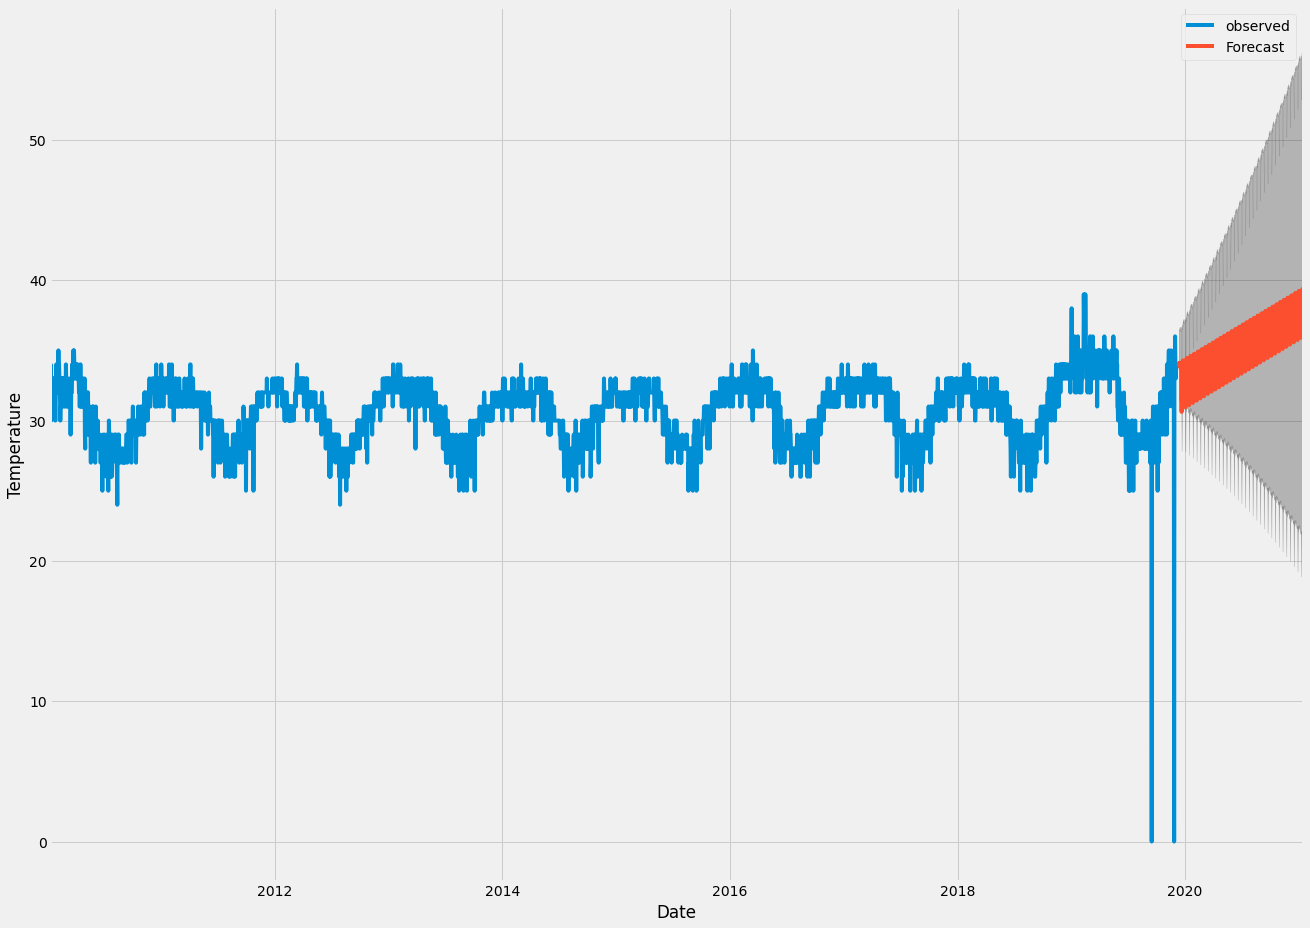

In [ ]:
ax = df_ts.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')

plt.legend()
plt.show()

**Time Series with Prophet**

In [ ]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('Lagos.csv')

df.head(5)

,date_time,Lagos_maxtempC,Lagos_mintempC,Lagos_totalSnow_cm,Lagos_sunHour,Lagos_uvIndex,Lagos_moon_illumination,Lagos_moonrise,Lagos_moonset,Lagos_sunrise,Lagos_sunset,Lagos_DewPointC,Lagos_FeelsLikeC,Lagos_HeatIndexC,Lagos_WindChillC,Lagos_WindGustKmph,Lagos_cloudcover,Lagos_humidity,Lagos_precipMM,Lagos_pressure,Lagos_tempC,Lagos_visibility,Lagos_winddirDegree,Lagos_windspeedKmph,Lagos_location
0,2010-01-11,31,26,0.0,11.5,7,19,03:44 AM,03:44 PM,07:01 AM,06:48 PM,25,33,33,29,16,15,80,0.7,1010,31,10,219,12,Lagos
1,2010-01-12,34,26,0.0,11.5,7,12,04:36 AM,04:35 PM,07:01 AM,06:48 PM,25,36,36,30,16,5,76,0.0,1010,34,10,245,11,Lagos
2,2010-01-13,32,26,0.0,11.5,7,5,05:28 AM,05:27 PM,07:02 AM,06:49 PM,25,34,34,29,19,9,79,0.0,1010,32,10,224,14,Lagos
3,2010-01-14,30,26,0.0,11.5,7,0,06:17 AM,06:17 PM,07:02 AM,06:49 PM,24,33,33,28,18,21,80,1.3,1011,30,10,217,13,Lagos
4,2010-01-15,31,26,0.0,11.5,7,0,07:04 AM,07:06 PM,07:02 AM,06:49 PM,24,33,33,29,15,16,79,0.7,1012,31,10,208,11,Lagos


In [ ]:
df.dtypes

date_time                   object
Lagos_maxtempC               int64
Lagos_mintempC               int64
Lagos_totalSnow_cm         float64
Lagos_sunHour              float64
Lagos_uvIndex                int64
Lagos_moon_illumination      int64
Lagos_moonrise              object
Lagos_moonset               object
Lagos_sunrise               object
Lagos_sunset                object
Lagos_DewPointC              int64
Lagos_FeelsLikeC             int64
Lagos_HeatIndexC             int64
Lagos_WindChillC             int64
Lagos_WindGustKmph           int64
Lagos_cloudcover             int64
Lagos_humidity               int64
Lagos_precipMM             float64
Lagos_pressure               int64
Lagos_tempC                  int64
Lagos_visibility             int64
Lagos_winddirDegree          int64
Lagos_windspeedKmph          int64
Lagos_location              object
dtype: object

In [ ]:
df['date_time'] = pd.DatetimeIndex(df['date_time'])
df.dtypes

date_time                  datetime64[ns]
Lagos_maxtempC                      int64
Lagos_mintempC                      int64
Lagos_totalSnow_cm                float64
Lagos_sunHour                     float64
Lagos_uvIndex                       int64
Lagos_moon_illumination             int64
Lagos_moonrise                     object
Lagos_moonset                      object
Lagos_sunrise                      object
Lagos_sunset                       object
Lagos_DewPointC                     int64
Lagos_FeelsLikeC                    int64
Lagos_HeatIndexC                    int64
Lagos_WindChillC                    int64
Lagos_WindGustKmph                  int64
Lagos_cloudcover                    int64
Lagos_humidity                      int64
Lagos_precipMM                    float64
Lagos_pressure                      int64
Lagos_tempC                         int64
Lagos_visibility                    int64
Lagos_winddirDegree                 int64
Lagos_windspeedKmph               

In [ ]:
df = df.rename(columns={'date_time': 'ds',
                        'Lagos_tempC': 'y'})

df.head(5)

,ds,Lagos_maxtempC,Lagos_mintempC,Lagos_totalSnow_cm,Lagos_sunHour,Lagos_uvIndex,Lagos_moon_illumination,Lagos_moonrise,Lagos_moonset,Lagos_sunrise,Lagos_sunset,Lagos_DewPointC,Lagos_FeelsLikeC,Lagos_HeatIndexC,Lagos_WindChillC,Lagos_WindGustKmph,Lagos_cloudcover,Lagos_humidity,Lagos_precipMM,Lagos_pressure,y,Lagos_visibility,Lagos_winddirDegree,Lagos_windspeedKmph,Lagos_location
0,2010-01-11,31,26,0.0,11.5,7,19,03:44 AM,03:44 PM,07:01 AM,06:48 PM,25,33,33,29,16,15,80,0.7,1010,31,10,219,12,Lagos
1,2010-01-12,34,26,0.0,11.5,7,12,04:36 AM,04:35 PM,07:01 AM,06:48 PM,25,36,36,30,16,5,76,0.0,1010,34,10,245,11,Lagos
2,2010-01-13,32,26,0.0,11.5,7,5,05:28 AM,05:27 PM,07:02 AM,06:49 PM,25,34,34,29,19,9,79,0.0,1010,32,10,224,14,Lagos
3,2010-01-14,30,26,0.0,11.5,7,0,06:17 AM,06:17 PM,07:02 AM,06:49 PM,24,33,33,28,18,21,80,1.3,1011,30,10,217,13,Lagos
4,2010-01-15,31,26,0.0,11.5,7,0,07:04 AM,07:06 PM,07:02 AM,06:49 PM,24,33,33,29,15,16,79,0.7,1012,31,10,208,11,Lagos


In [ ]:
df.columns

Index(['ds', 'Lagos_maxtempC', 'Lagos_mintempC', 'Lagos_totalSnow_cm',
       'Lagos_sunHour', 'Lagos_uvIndex', 'Lagos_moon_illumination',
       'Lagos_moonrise', 'Lagos_moonset', 'Lagos_sunrise', 'Lagos_sunset',
       'Lagos_DewPointC', 'Lagos_FeelsLikeC', 'Lagos_HeatIndexC',
       'Lagos_WindChillC', 'Lagos_WindGustKmph', 'Lagos_cloudcover',
       'Lagos_humidity', 'Lagos_precipMM', 'Lagos_pressure', 'y',
       'Lagos_visibility', 'Lagos_winddirDegree', 'Lagos_windspeedKmph',
       'Lagos_location'],
      dtype='object')

In [ ]:
#drop features
df_dts = df.drop(['Lagos_maxtempC', 'Lagos_mintempC', 'Lagos_totalSnow_cm',
       'Lagos_sunHour', 'Lagos_uvIndex', 'Lagos_moon_illumination',
       'Lagos_moonrise', 'Lagos_moonset', 'Lagos_sunrise', 'Lagos_sunset',
       'Lagos_DewPointC', 'Lagos_FeelsLikeC', 'Lagos_HeatIndexC',
       'Lagos_WindChillC', 'Lagos_WindGustKmph', 'Lagos_cloudcover',
       'Lagos_humidity', 'Lagos_precipMM', 'Lagos_pressure',
       'Lagos_visibility', 'Lagos_winddirDegree', 'Lagos_windspeedKmph',
       'Lagos_location'], axis=1)
df_dts.head(5)

,ds,y
0,2010-01-11,31
1,2010-01-12,34
2,2010-01-13,32
3,2010-01-14,30
4,2010-01-15,31


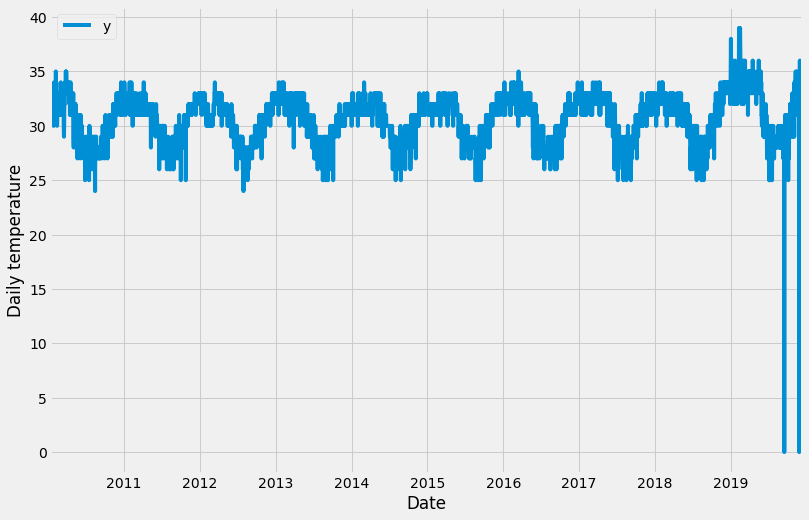

In [ ]:
ax = df_dts.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Daily temperature')
ax.set_xlabel('Date')

plt.show()

In [ ]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [ ]:
my_model.fit(df_dts)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
3653,2022-08-01
3654,2022-09-01
3655,2022-10-01
3656,2022-11-01
3657,2022-12-01


In [ ]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3653,2022-08-01,30.066846,27.713228,32.423012
3654,2022-09-01,30.331819,27.702852,32.789794
3655,2022-10-01,31.771275,29.040855,34.248251
3656,2022-11-01,33.421912,31.133447,35.867066
3657,2022-12-01,34.287851,31.917233,36.912205


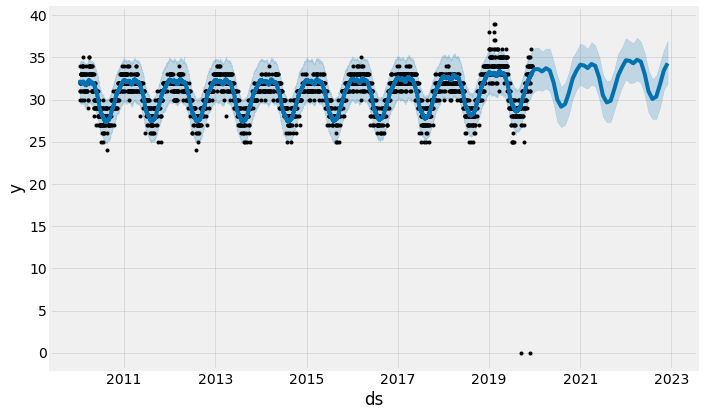

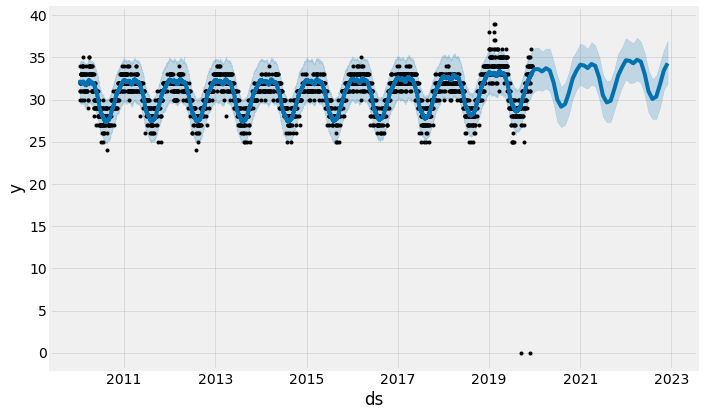

In [ ]:
my_model.plot(forecast, uncertainty=True)

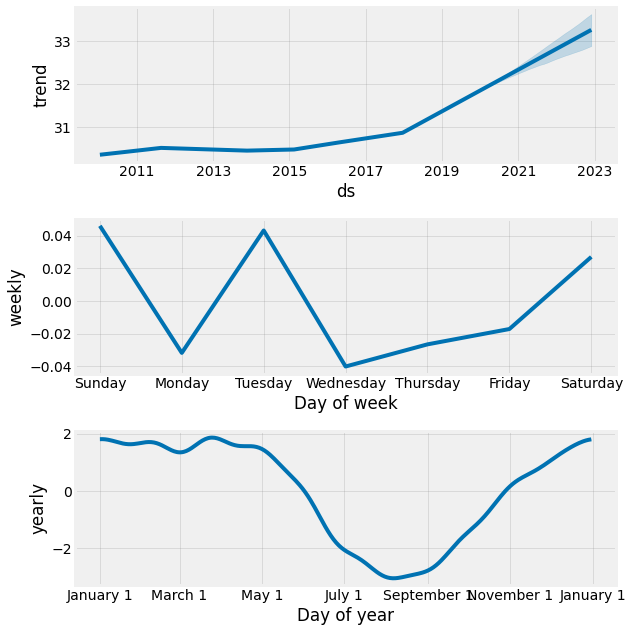

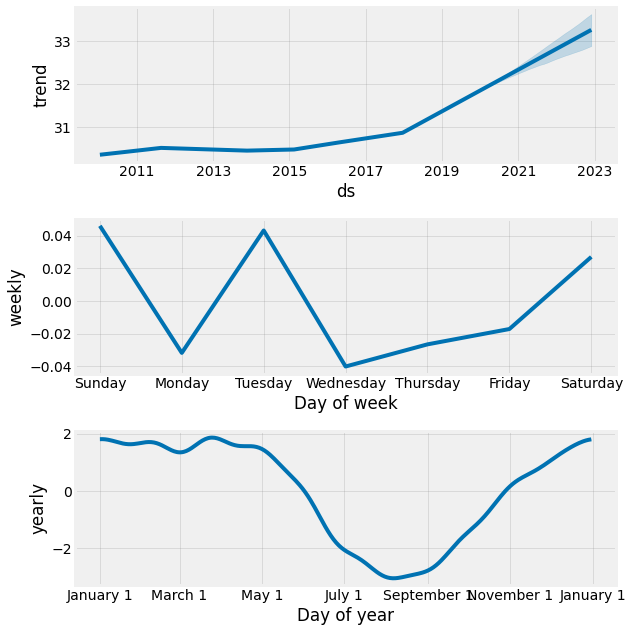

In [ ]:
my_model.plot_components(forecast)

# **References**
1) https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7

2) https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

3) https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

4) https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

5) https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3